In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np


In [2]:
df=pd.read_csv('train_wids.csv')
warnings.filterwarnings("ignore")

#### My functions

In [3]:
def splitcategories(df):
    nums=df._get_numeric_data().columns
    cats=list(set(df.columns)-set(nums))
    return nums,cats

def filterColsbyNA(df,num):
    df.shape
    temp=pd.DataFrame(df.isna().sum()).reset_index()
    temp=temp.set_axis(['name','nullcount'],axis=1)
    temp['ratio']=temp.nullcount/df.shape[0]*100
    return temp.loc[temp.ratio>num].name.to_list()

def getsmallercols(df,limit):
    nums=df._get_numeric_data().columns.to_list()
    a=[]
    for col in nums:
        if df[col].value_counts().count() < limit:
            a.append(col)
    return a
def addBinnedCols(df,cols,binSize):
    y=list(map(lambda x:x/binSize ,list(range(1,binSize+1)))) 
    for col in cols:
        a=df[col].quantile(y).to_list()
        df[str(col)+'_binned']=df[col].apply(lambda x:getVal(a,x))
    return df

## Data Cleaning

In [4]:
cols=df.columns.to_list()
nums,cats=splitcategories(df)
nacols=filterColsbyNA(df,10)

In [5]:
nacols

['energy_star_rating',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog']

In [6]:
df[set(cols)-set(nacols)].isna().sum()

june_max_temp              0
heating_degree_days        0
days_above_100F            0
days_above_110F            0
september_min_temp         0
cooling_degree_days        0
precipitation_inches       0
december_min_temp          0
may_min_temp               0
id                         0
days_below_20F             0
december_avg_temp          0
february_min_temp          0
september_avg_temp         0
october_max_temp           0
november_avg_temp          0
january_min_temp           0
floor_area                 0
ELEVATION                  0
june_avg_temp              0
august_max_temp            0
october_avg_temp           0
july_avg_temp              0
march_avg_temp             0
october_min_temp           0
days_below_0F              0
november_min_temp          0
snowfall_inches            0
days_above_90F             0
year_built              1837
avg_temp                   0
may_avg_temp               0
november_max_temp          0
snowdepth_inches           0
may_max_temp  

In [7]:
#Dropping NA values of 1837 from year_built
df1=df.loc[~df[set(cols)-set(nacols)].year_built.isna()]
# Target Variable is site_eui

<AxesSubplot:ylabel='site_eui'>

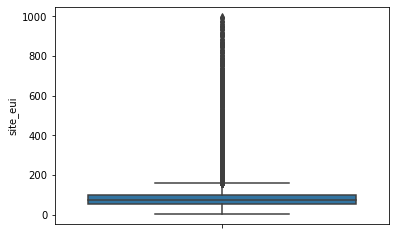

In [8]:
sns.boxplot(y=df1.site_eui)

#### As we can see that there are too many outliers in dependent variable,hence trimming by 93rd percentile

In [9]:
lower,upper=df1.site_eui.quantile([0,0.939])

<AxesSubplot:ylabel='site_eui'>

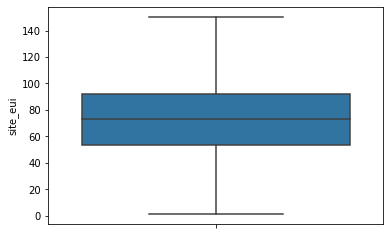

In [10]:
df2=df1.loc[(df1.site_eui>lower) & (df1.site_eui<upper)]
sns.boxplot(y=df2.site_eui)

#### Plot dependent variable after removing outliers

In [11]:
red=round((df2.shape[0]/df.shape[0])*100,2)
print("Total reduction in dataset size after Data Cleaning %f "%(100- red)+"%")
df2=df2[set(cols)-set(nacols)]
df2

Total reduction in dataset size after Data Cleaning 8.380000 %


,june_max_temp,heating_degree_days,days_above_100F,days_above_110F,september_min_temp,cooling_degree_days,precipitation_inches,december_min_temp,may_min_temp,id,...,days_above_80F,august_avg_temp,building_class,april_avg_temp,april_min_temp,july_min_temp,march_max_temp,april_max_temp,august_min_temp,site_eui
1,90,2960,0,0,52,115,16.59,36,46,1,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,26.500150
2,90,2960,0,0,52,115,16.59,36,46,2,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,24.693619
3,90,2960,0,0,52,115,16.59,36,46,3,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,48.406926
4,90,2960,0,0,52,115,16.59,36,46,4,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,3.899395
5,90,2960,0,0,52,115,16.59,36,46,5,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,6.597715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75751,91,3772,0,0,44,260,45.03,24,45,75751,...,25,68.612903,Residential,56.266667,40,54,71,89,52,70.298783
75752,91,3772,0,0,44,260,45.03,24,45,75752,...,25,68.612903,Commercial,56.266667,40,54,71,89,52,132.918411
75753,91,3772,0,0,44,260,45.03,24,45,75753,...,25,68.612903,Residential,56.266667,40,54,71,89,52,39.483672
75754,86,6218,0,0,41,55,106.32,15,40,75754,...,6,61.612903,Commercial,50.183333,34,48,62,79,48,48.404398


## Performing EDA

In [12]:
df2

,june_max_temp,heating_degree_days,days_above_100F,days_above_110F,september_min_temp,cooling_degree_days,precipitation_inches,december_min_temp,may_min_temp,id,...,days_above_80F,august_avg_temp,building_class,april_avg_temp,april_min_temp,july_min_temp,march_max_temp,april_max_temp,august_min_temp,site_eui
1,90,2960,0,0,52,115,16.59,36,46,1,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,26.500150
2,90,2960,0,0,52,115,16.59,36,46,2,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,24.693619
3,90,2960,0,0,52,115,16.59,36,46,3,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,48.406926
4,90,2960,0,0,52,115,16.59,36,46,4,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,3.899395
5,90,2960,0,0,52,115,16.59,36,46,5,...,14,62.161290,Commercial,55.500000,41,52,80,78,52,6.597715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75751,91,3772,0,0,44,260,45.03,24,45,75751,...,25,68.612903,Residential,56.266667,40,54,71,89,52,70.298783
75752,91,3772,0,0,44,260,45.03,24,45,75752,...,25,68.612903,Commercial,56.266667,40,54,71,89,52,132.918411
75753,91,3772,0,0,44,260,45.03,24,45,75753,...,25,68.612903,Residential,56.266667,40,54,71,89,52,39.483672
75754,86,6218,0,0,41,55,106.32,15,40,75754,...,6,61.612903,Commercial,50.183333,34,48,62,79,48,48.404398


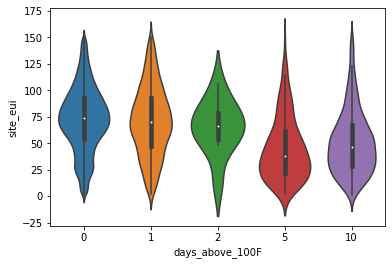

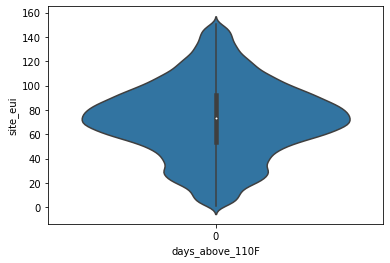

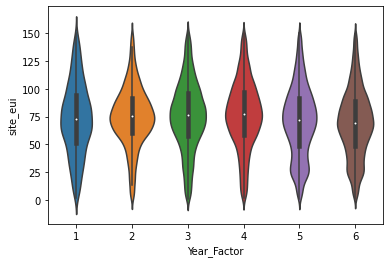

In [13]:
for col in getsmallercols(df2,15):
    sns.violinplot(data=df2,x=col,y='site_eui')
    plt.show()
    

In [27]:
df2.days_above_110F.value_counts()

0    69409
Name: days_above_110F, dtype: int64

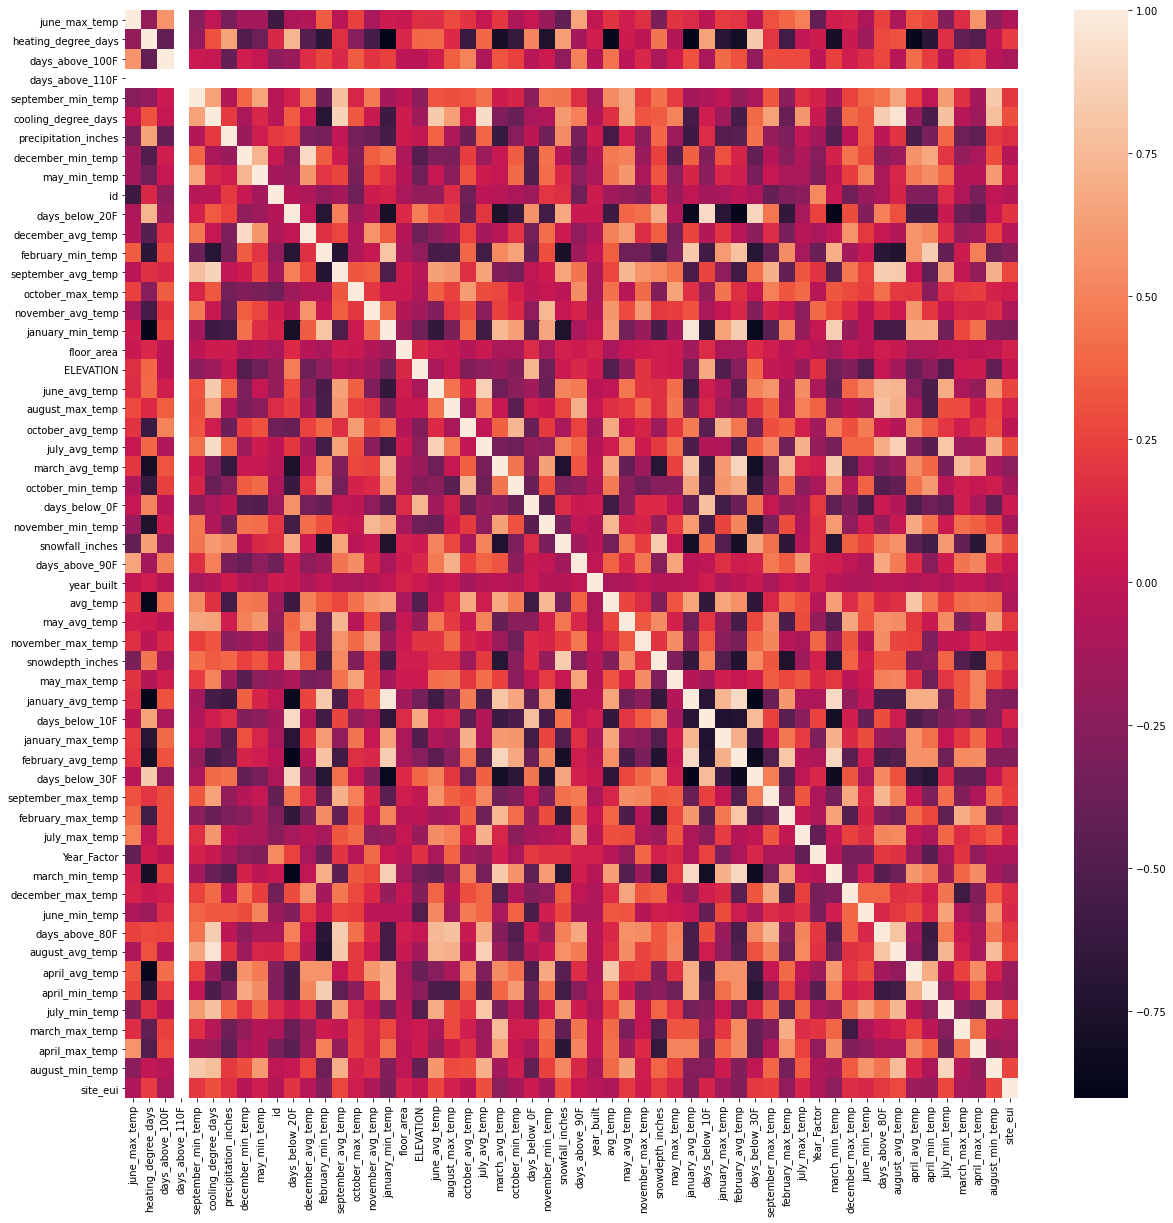

In [25]:
df2.corr()
plt.figure(figsize=[20,20])
sns.heatmap(df2.corr())
plt.show()

ss
